In [2]:
import pandas as pd
data_path=path="../data/demo_data/metric/metrics_100.csv"
metric_data_df=pd.read_csv(data_path)
train_data=metric_data_df.values.T[1:]
# 先取30条时间序列作poc
columns=[str(i) for i in range(30)]
metric_data_df=metric_data_df[columns]
X_train=metric_data_df.values.T[1:]

In [4]:
import numpy
import matplotlib.pyplot as plt
from tslearn.clustering import KShape

seed = 0
numpy.random.seed(seed)
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)


0.016 --> 0.016 --> 0.016 --> 0.016 --> 0.015 --> 0.015 --> 0.015 --> 


In [5]:
cluster=dict()
cluster[0]=[]
cluster[1]=[]
cluster[2]=[]
for res in zip([i for i in range(30)],y_pred):
    cluster[res[1]].append(res[0])
for k in cluster:
    print("类别{}中包含的metric为：{}".format(k,cluster[k]))

类别0中包含的metric为：[2, 9, 10, 17, 18, 25]
类别1中包含的metric为：[4, 5, 8, 12, 15, 19, 20, 26, 28]
类别2中包含的metric为：[0, 1, 3, 6, 7, 11, 13, 14, 16, 21, 22, 23, 24, 27]


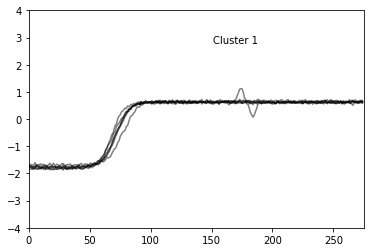

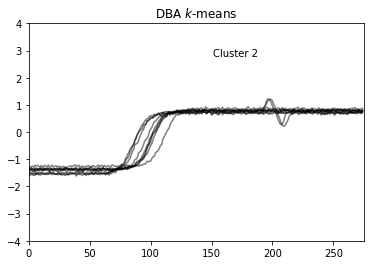

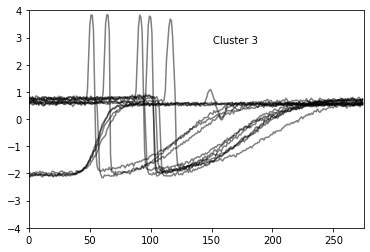

In [6]:
for yi in range(3):
    plt.figure()
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.5)
    plt.xlim(0, X_train.shape[1])
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")